# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–∫—Å–∏—á–Ω–æ—Å—Ç–∏ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å –¥–ª—è –ø–æ–∏—Å–∫–∞ —Ç–æ–∫—Å–∏—á–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤. –¢—Ä–µ–±—É–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ *F1*  - –Ω–µ –º–µ–Ω—å—à–µ 0.75. 


### –û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–î–∞–Ω–Ω—ã–µ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ —Ñ–∞–π–ª–µ ***toxic_comments.csv***. –°—Ç–æ–ª–±–µ—Ü **text** –≤ –Ω—ë–º —Å–æ–¥–µ—Ä–∂–∏—Ç —Ç–µ–∫—Å—Ç –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è, –∞ **toxic** ‚Äî —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫.

# 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞

–ò–º–ø–æ—Ä—Ç –º–æ–¥—É–ª–µ–π:

In [104]:
!python -m pip install spacy -q 
!python -m spacy download en -q
!python -m pip install profanityfilter -q
!python -m pip install pyspellchecker -q

‚úî Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
‚úî Linking successful
/home/vykers/anaconda3/envs/p36/lib/python3.6/site-packages/en_core_web_sm -->
/home/vykers/anaconda3/envs/p36/lib/python3.6/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [105]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sps
import lightgbm as lgb
from profanityfilter import ProfanityFilter
from spellchecker import SpellChecker

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

import spacy
spacy.prefer_gpu()
nlp = spacy.load('en', disable=['parser', 'ner'])

stopwords_ = set(stopwords.words('english'))
    
R = 10000

In [106]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vykers/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/vykers/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vykers/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

–û—Ç–∫—Ä–æ–µ–º –¥–∞—Ç–∞—Å–µ—Ç:

In [107]:
dirname = './datasets/'
comments = pd.read_csv(dirname + 'toxic_comments.csv')

comments.sample(5, random_state=R)

text  toxic
78757   That's not universally correct. Many non-Chris...      0
28455                             User:Abd is muslim cr@p      1
146262  January 2010 \n Please stop your disruptive ed...      0
49009   I think I've made it clear why I've chosen to ...      1
147635  Mariana Championship \n\nWanted to let you kno...      0

–ò–∑—É—á–∏–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ç–∞–±–ª–∏—Ü–µ:

In [108]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


–í —Ç–∞–±–ª–∏—Ü–µ 159571 –∑–∞–ø–∏—Å—å, –ø—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç. 

# 2. –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

### –ò–∑—É—á–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –∏ —Ç–µ–∫—Å—Ç–æ–≤ —Å–æ–æ–±—â–µ–Ω–∏–π:
–ò–∑—É—á–∏–º —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞:

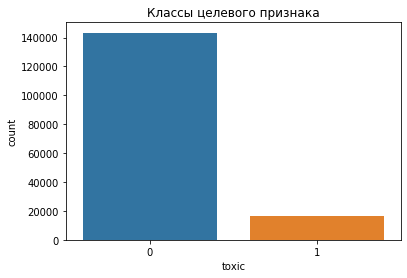

In [109]:
sns.countplot(comments['toxic']).set_title('–ö–ª–∞—Å—Å—ã —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞')
plt.show()

–ò–º–µ–µ—Ç—Å—è —Å–∏–ª—å–Ω—ã–π –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ - "—Ç–æ–∫—Å–∏—á–Ω—ã—Ö" –∑–∞–ø–∏—Å–µ–π –Ω–∞–º–Ω–æ–≥–æ –º–µ–Ω—å—à–µ, —á–µ–º –æ–±—ã—á–Ω—ã—Ö.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–º–µ—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞:

In [110]:
print('–ù–æ—Ä–º–∞–ª—å–Ω—ã–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏:')
for x, y in comments.query('toxic == 0').sample(4, random_state=R).values:
    print('\nTEXT:', x[: 300], '\nTOXIC:', y)

–ù–æ—Ä–º–∞–ª—å–Ω—ã–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏:

TEXT: "

Endorse. Please take a look at this diff  where David states having anti-Islamic sentiment. In order to cite one example, please take a look at this diff  where he renames ""Listed terrorist organisations"" to ""Islam-inspired listed terrorist organisations"".  " 
TOXIC: 0

TEXT: (personal opinion, but I can't imagine that you would openly lie, given the administration powers). 
TOXIC: 0

TEXT: May 2013 (UTC)
No worries.  Is it correct that I ask users for a co-nomination statement?  Just want to be sure I don't inadvertently breach WP:CANVASS.  And would you say there's an appropriate number of co-nominators to seek?  Looking through the past RFAs it seems to range from none to two.  Hope 
TOXIC: 0

TEXT: Re:Disam 

Why thank you! ) I really appreciate that. Yes, it's all done manually. I never have mastered TWINKLE or any of the other tools. Anyway, I truly appreciate the compliment. It means alot to me. Woohoo! 
TOXIC: 0


In [111]:
print('–¢–æ–∫—Å–∏—á–Ω—ã–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏:')
for x, y in comments.query('toxic == 1').sample(4, random_state=R).values:
    print('\nTEXT:', x[: 300], '\nTOXIC:', y)

–¢–æ–∫—Å–∏—á–Ω—ã–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏:

TEXT: The EA Prayer 

Dear lord, please let EA not fuck this one up, like they fucked up Renegade and Generals... amen. 
TOXIC: 1

TEXT: WIKIBITCH 

YO LIL PUNKASS AINT SHIT OUT ON DA STREETS NIGGA 
TOXIC: 1

TEXT: NOOOO! 

How dare you block my best enemy Yesmoredonkeys from Wikipedia? His articles were the best thing there. Now nothing can replace him, not even your ugly face! Now nobody will want to visit Wikipedia, jerk! Now I am going to give you two options: suffer the consequences, or pay the price. Pic 
TOXIC: 1

TEXT: Eric W.Bragg's Surrealism: SIDEWALK STAINS

In my lifetime, I have seen some of the most stupidest crap that my eyes have unfortunately seen! However, this tops them all, Eric W.Bragg presents, SIDEWALK STAINS! (I am not making this up):

http://www.surrealcoconut.com/surrealism_gallery/Found_Object 
TOXIC: 1


–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤ —Ç–µ–∫—Å—Ç–∞—Ö —Å–æ–æ–±—â–µ–Ω–∏–π –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç URL-–∞–¥—Ä–µ—Å–∞, —é–∑–µ—Ä–Ω–µ–π–º—ã, —Ä–∞–∑–ª–∏—á–Ω–∞—è –∫–∞–ø–∏—Ç–∞–ª–∏–∑–∞—Ü–∏—è —Å–ª–æ–≤, –ø—É–Ω–∫—Ç—É–∞—Ü–∏—è –∏ –ø—Ä–æ—á–∏–µ —Å–∏–º–≤–æ–ª—ã.

–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–∞–∫—É—é –≤–µ–ª–∏—á–∏–Ω—É, –∫–∞–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∏–º–≤–æ–ª–æ–≤ –≤ —Ç–µ–∫—Å—Ç–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è:

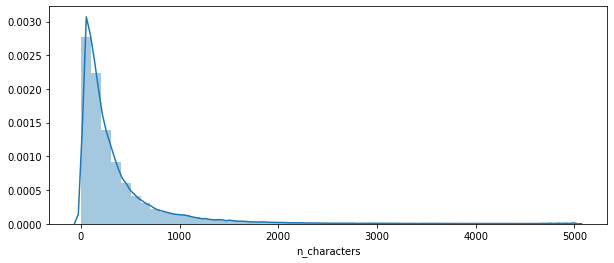

In [112]:
comments['n_characters'] = comments['text'].str.len()
plt.figure(figsize=(10,4))
sns.distplot(comments['n_characters'])
plt.show()

–ú–æ–∂–Ω–æ –≤–∏–¥–µ—Ç—å, —á—Ç–æ –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –Ω–µ –ø—Ä–µ–≤—ã—à–∞–µ—Ç 500 - 1000 –∑–Ω–∞–∫–æ–≤. –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä —Å–æ–æ–±—â–µ–Ω–∏—è —Ä–∞–≤–µ–Ω 5000. –ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞–¥–∏ –ø—Ä–∏–º–µ—Ä–∞ –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–∞–∫–∏—Ö —Å–æ–æ–±—â–µ–Ω–∏–π.

In [113]:
(comments.loc[comments['n_characters'] == 5000, 'text']
         .head(3)
         .str.slice(0, 300)                          # –æ–≥—Ä–∞–Ω–∏—á–∏–º –≤—ã–≤–æ–¥
         .values)

array(['ii CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, CHULA VISTA, FUCKING GET YOUR INFORMATION RIGHT FAGGOT SHITHEAD!!i CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, ',
       'SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SECURITYFUCK H',
       'BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS '],
      dtype=object)

–í–∏–¥–∏–º, —á—Ç–æ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —Ç–∞–∫–∏–µ –¥–ª–∏–Ω–Ω—ã–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ —è–≤–ª—è—é—Ç—Å—è –∫–æ–ø–∏–ø–∞—Å—Ç–æ–º –æ–¥–Ω–æ–π-–¥–≤—É—Ö –∫–æ—Ä–æ—Ç–∫–∏—Ö —Ñ—Ä–∞–∑ –¥–æ –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è –ª–∏–º–∏—Ç–∞ –∑–Ω–∞–∫–æ–≤. –ù–∞–ª–∏—á–∏–µ —Ç–∞–∫–∏—Ö —Å–ø–∞–º-—Å–æ–æ–±—â–µ–Ω–∏–π –º–æ–∂–µ—Ç –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ —Ä–∞–±–æ—Ç—É –º–æ–¥–µ–ª–∏ (–∏—Å–ø–æ—Ä—Ç–∏—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å–ª–æ–≤), –ø–æ—ç—Ç–æ–º—É –¥–∞–ª–µ–µ –º—ã —Ä–∞–∑–±–µ—Ä–µ–º—Å—è, –∫–∞–∫ –∏—Ö –∏—Å–ø—Ä–∞–≤–∏—Ç—å.

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ç–∞–∫–∂–µ –Ω–∞ —Å–∞–º—ã–µ –∫–æ—Ä–æ—Ç–∫–∏–µ —Å–æ–æ–±—â–µ–Ω–∏—è:

In [114]:
comments.sort_values('n_characters').head(5)

text  toxic  n_characters
137062    ~ J.Lo      0             6
52442     14:53,      0             6
109985  {{unbloc      0             8
121074  you suck      1             8
118850  FUCK YOU      1             8

–ö–∞–∫ –≤–∏–¥–∏–º, —Å—Ä–µ–¥–∏ –∫–æ—Ä–æ—Ç–∫–∏—Ö —Å–æ–æ–±—â–µ–Ω–∏–π –µ—Å—Ç—å –∏ –±–µ—Å—Å–º—ã—Å–ª–µ–Ω–Ω—ã–µ, –∏ –æ—Å–º—ã—Å–ª–µ–Ω–Ω—ã–µ —Ç–µ–∫—Å—Ç—ã.

### –°–æ–∑–¥–∞–Ω–∏–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ü—Ä–µ–∂–¥–µ —á–µ–º –ø—Ä–∏—Å—Ç—É–ø–∏—Ç—å –∫ –æ—á–∏—Å—Ç–∫–µ –∏ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤, –ø–æ–ø—Ä–æ–±—É–µ–º –∏–∑–≤–ª–µ—á—å –∏–∑ –Ω–∏—Ö –º–µ—Ç–∞–ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞—Ç—å —Å –∫–ª–∞—Å—Å–æ–º —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –í –∫–∞—á–µ—Å—Ç–≤–µ —Ç–∞–∫–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å:

- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤, –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –∏ –∞–±–∑–∞—Ü–µ–≤ –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏;
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤, –Ω–∞–±—Ä–∞–Ω–Ω—ã—Ö –∫–∞–ø—Å–æ–º;
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ø-—Å–ª–æ–≤;
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞–∫–æ–≤ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è (–≤–æ—Å–∫–ª–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö, –≤–æ–ø—Ä–æ—Å–∏—Ç–µ–ª—å–Ω—ã—Ö –∏ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.

–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ–± —ç—Ç–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö –ø—Ä–æ–ø–∞–¥–µ—Ç –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞, —Ç–∞–∫ —á—Ç–æ –∏—Ö —Å–ª–µ–¥—É–µ—Ç —Å–æ–∑–¥–∞—Ç—å –∑–∞—Ä–∞–Ω–µ–µ. –ü–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –≤—ã–¥–µ–ª–∏–º —Å–ª–µ–¥—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤;
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–∞—Ç–∞;
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–µ—á–∞—Ç–æ–∫.

–ü—Ä–∏ —ç—Ç–æ–º, —Å —É—á–µ—Ç–æ–º –±–æ–ª—å—à–æ–≥–æ —Ä–∞–∑–±—Ä–æ—Å–∞ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –ø–æ –¥–ª–∏–Ω–µ, –ø—Ä–∏–∑–Ω–∞–∫–∏ –±—É–¥–µ–º –Ω–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–Ω–∞–∫–æ–≤:

In [115]:
#–°–ª–æ–≤–∞
comments['num_words'] = comments['text'].apply(lambda t: len(t.split()))
#–ö–∞–ø—Å
comments['n_caps'] = comments['text'].apply(lambda t: sum(1 for c in t if c.isupper()))
#–°—Ç–æ–ø-—Å–ª–æ–≤–∞
comments['n_stopwords'] = comments['text'].apply(lambda t: sum(t.count(w) for w in set(stopwords_)))
#–í–æ—Å–∫–ª. –∑–Ω–∞–∫–∏
comments['n_excl_marks'] = comments['text'].apply(lambda t: t.count('!'))
#–í–æ–ø—Ä. –∑–Ω–∞–∫–∏
comments['n_q_marks'] = comments['text'].apply(lambda t: t.count('?'))
#–ü—É–Ω–∫—Ç—É–∞—Ü–∏—è
comments['n_punkt'] = comments['text'].apply(lambda t: sum(t.count(w) for w in string.punctuation))
#–ê–±–∑–∞—Ü—ã
comments['n_paragraphs'] = comments['text'].apply(lambda t: t.count('\n') + 1)
#–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è
comments['n_sentences']=comments["text"].apply(lambda x: len(sent_tokenize(x)))

#–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
for column in comments.iloc[:, 3:].columns:
    comments[column + '_norm'] = comments[column] / comments['n_characters']

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–∞–±–ª–∏—Ü—É:

In [116]:
comments.head()

text  toxic  n_characters  \
0  Explanation\nWhy the edits made under my usern...      0           264   
1  D'aww! He matches this background colour I'm s...      0           112   
2  Hey man, I'm really not trying to edit war. It...      0           233   
3  "\nMore\nI can't make any real suggestions on ...      0           622   
4  You, sir, are my hero. Any chance you remember...      0            67   

   num_words  n_caps  n_stopwords  n_excl_marks  n_q_marks  n_punkt  \
0         43      17          143             0          1       10   
1         17       8           41             1          0       12   
2         42       4          159             0          0        6   
3        113      11          369             0          0       21   
4         13       2           36             0          1        5   

   n_paragraphs  n_sentences  num_words_norm  n_caps_norm  n_stopwords_norm  \
0             2            3        0.162879     0.064394          0.541667   
1             1            4        0.151786     0.071429          0.366071   
2             1            3        0.180258     0.017167          0.682403   
3             5            4        0.181672     0.017685          0.593248   
4             1            2        0.194030     0.029851          0.537313   

   n_excl_marks_norm  n_q_marks_norm  n_punkt_norm  n_paragraphs_norm  \
0           0.000000        0.003788      0.037879           0.007576   
1           0.008929        0.000000      0.107143           0.008929   
2           0.000000        0.000000      0.025751           0.004292   
3           0.000000        0.000000      0.033762           0.008039   
4           0.000000        0.014925      0.074627           0.014925   

   n_sentences_norm  
0          0.011364  
1          0.035714  
2          0.012876  
3          0.006431  
4          0.029851

### –û—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞

–û—á–∏—Å—Ç–∏–º —Ç–µ–∫—Å—Ç —Å–æ–æ–±—â–µ–Ω–∏–π –æ—Ç –∑–Ω–∞–∫–æ–≤ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è, —Å—Å—ã–ª–æ–∫, —é–∑–µ—Ä–Ω–µ–π–º–æ–≤ –∏ –ø—Ä–æ—á–∏—Ö –Ω–µ–Ω—É–∂–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤. –û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏—é clean_text:

In [117]:
def clean_text(text):
    
    username_pattern = re.compile(r'user\S*')                 #—é–∑–µ—Ä–Ω–µ–π–º—ã
    url_pattern = re.compile(r'https?://\S+|www\.\S+')        #—Å—Å—ã–ª–∫–∏
    html_tag_pattern = re.compile(r'<.*?>')                   #html-—Ç—ç–≥–∏
    char_pattern = re.compile(r'[^a-z]')                      #–≤—Å–µ, –∫—Ä–æ–º–µ –ª–∞—Ç–∏–Ω—Å–∫–∏—Ö –±—É–∫–≤
    for pattern in [username_pattern, url_pattern, html_tag_pattern, char_pattern]:
        text = pattern.sub(r' ',text.lower())
    return ' '.join([w for w in text.split() if (1 < len(w) < 25)]) #–æ–≥—Ä–∞–Ω–∏—á–∏–º –¥–ª–∏–Ω—É —Å–ª–æ–≤

#–ü—Ä–æ–≤–µ—Ä–∫–∞
example = "<b>User:john should CHECK out http://www.hh.ru \U0001F600!!!\nIt's cool</b>"
print('–ü—Ä–æ–≤–µ—Ä–∫–∞: –¥–æ –æ—á–∏—Å—Ç–∫–∏:', example)
print('\n–ü–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏:', clean_text(example))

–ü—Ä–æ–≤–µ—Ä–∫–∞: –¥–æ –æ—á–∏—Å—Ç–∫–∏: <b>User:john should CHECK out http://www.ya.ru üòÄ!!!
It's cool</b>

–ü–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: should check out it cool


–ü—Ä–∏–º–µ–Ω–∏–º —Ñ—É–Ω–∫—Ü–∏—é clean_text –∫ —Å—Ç–æ–ª–±—Ü—É —Å –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è–º–∏:

In [118]:
comments['clean_text'] = comments['text'].apply(clean_text)
comments.drop(columns=['text'], inplace=True)

–ü—Ä–µ–∂–¥–µ —á–µ–º –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å, –≤—ã–¥–µ–ª–∏–º –µ—â–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤, –º–∞—Ç–∞ –∏ –æ–ø–µ—á–∞—Ç–æ–∫:

In [119]:
#–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ —Å–ª–æ–≤–∞
comments['n_unique_words'] = comments['clean_text'].apply(lambda t: len(set(w for w in t.split())))
comments['unique_words_norm'] = comments['n_unique_words'] / comments['n_characters']

–î–ª—è –º–∞—Ç–∞ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Å–ª–æ–≤–∞—Ä–µ–º –∏–∑ –º–æ–¥—É–ª—è ProfanityFilter:

In [120]:
#–ú–∞—Ç
pf = ProfanityFilter()
badwords = set(x.lower() for x in pf.get_profane_words())

comments['n_profanities'] = comments['clean_text'].apply(lambda t: len([w for w in t.split() if w in badwords]))
comments['prof_norm'] = comments['n_profanities'] / comments['n_characters']

–î–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ –æ–ø–µ—á–∞—Ç–æ–∫ –∏—Å–ø–æ–ª—å–∑—É–µ–º –º–æ–¥—É–ª—å pyspellchecker. –ò—Å–ø—Ä–∞–≤–ª—è—Ç—å –æ–ø–µ—á–∞—Ç–∫–∏ –Ω–µ –±—É–¥–µ–º (—Ñ—É–Ω–∫—Ü–∏—è correct –Ω–∞ –Ω–∞—à–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ):

In [121]:
#–û–ø–µ—á–∞—Ç–∫–∏
sc = SpellChecker()

comments['n_typos'] = comments['clean_text'].apply(lambda t: len(sc.unknown(t.split())))
comments['typos_norm'] = comments['n_typos'] / comments['n_characters']

–ù–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–º –æ–±—Ä–µ–∑–∫—É —Å–ø–∞–º-–∫–æ–º–º–µ–Ω—Ç–æ–≤. –°–ø–∞–º–æ–º –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏, —É –∫–æ—Ç–æ—Ä—ã—Ö –±–æ–ª—å—à–∞—è –¥–ª–∏–Ω–∞, –∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤ –º–∞–ª–æ:

In [122]:
def spam_trimmer(inp):
    text, n_unique, unique_norm = inp.values
    if 0 < unique_norm < 0.02:            # –∑–Ω–∞—á–µ–Ω–∏–µ 0.02 –ø–æ–¥–æ–±—Ä–∞–Ω–æ –æ–ø—ã—Ç–Ω—ã–º –ø—É—Ç–µ–º                   
        text = ' '.join(text.split()[0: 2 * n_unique])
    return text
#–ü—Ä–æ–≤–µ—Ä–∫–∞
print(comments.query('0 < unique_words_norm < 0.02').tail(1)['clean_text'].str.slice(0, 300).values)
print('\n', comments.query('0 < unique_words_norm < 0.02').tail(1)
      [['clean_text', 'n_unique_words', 'unique_words_norm']].apply(spam_trimmer, axis=1).values)

['hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia hi wikipedia h']

 ['hi wikipedia hi wikipedia']


–ü—Ä–∏–º–µ–Ω–∏–º —Ñ—É–Ω–∫—Ü–∏—é –∫ —Ç–µ–∫—Å—Ç—É:

In [123]:
comments['clean_text'] = (comments[['clean_text', 'n_unique_words', 'unique_words_norm']]
                          .apply(spam_trimmer, axis=1))

### –ò–∑—É—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ú—ã —Å–æ–∑–¥–∞–ª–∏ –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –æ–Ω–∏ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –∏ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ —ç—Ç–æ–≥–æ –æ—Ç–±–µ—Ä–µ–º –∏–∑ –Ω–∏—Ö —Å–∞–º—ã–µ –≤–∞–∂–Ω—ã–µ:

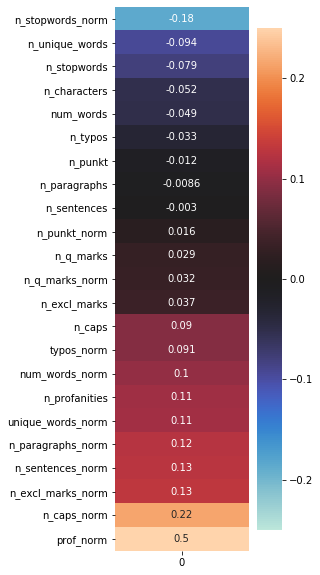

In [124]:
new_features = comments.drop(columns = ['clean_text', 'toxic']).columns

correlations = [comments[f].corr(comments['toxic']) for f in new_features]
correlations = pd.DataFrame(index = new_features, data = correlations).sort_values(0)

plt.figure(figsize=(3,10))
sns.heatmap(correlations, annot=True, vmin=-0.25, vmax=0.25, center=0.0)
plt.show()

–í–∏–¥–∏–º —Å–ª–µ–¥—É—é—â–µ–µ:
1. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –ø—Ä–æ—è–≤–ª—è–µ—Ç—Å—è —Å–∏–ª—å–Ω–µ–µ, —á–µ–º —Å –æ–±—ã—á–Ω—ã–º–∏, —á—Ç–æ –ª–æ–≥–∏—á–Ω–æ, —É—á–∏—Ç—ã–≤–∞—è –±–æ–ª—å—à—É—é —Ä–∞–∑–Ω–∏—Ü—É –≤ –¥–ª–∏–Ω–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤;
2. –ù–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω–æ —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ —Å–≤—è–∑–∞–Ω —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Ä—É–≥–∞—Ç–µ–ª—å—Å—Ç–≤ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Å–ª–æ–≤, –Ω–∞–±—Ä–∞–Ω–Ω—ã—Ö –∫–∞–ø—Å–æ–º (—á—Ç–æ –≤–ø–æ–ª–Ω–µ –ª–æ–≥–∏—á–Ω–æ). –¢–∞–∫–∂–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç —Å –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –≤–æ—Å–∫–ª–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤, –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –∏ –∞–±–∑–∞—Ü–µ–≤;
3. –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –≤—ã—è–≤–ª–µ–Ω–∞ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Å—Ç–æ–ø-—Å–ª–æ–≤ –∏, –≤ –º–µ–Ω—å—à–µ–π —Å—Ç–µ–ø–µ–Ω–∏, —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤.

–û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ —Ç–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, —É –∫–æ—Ç–æ—Ä—ã—Ö –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ –º–æ–¥—É–ª—é –Ω–µ –º–µ–Ω—å—à–µ 0.09:

In [125]:
comments = comments.drop(columns=correlations.loc[abs(correlations[0]) < 0.09].index)
comments.shape

(159571, 13)

In [126]:
comments.to_csv('comments_after_cleaning.csv', index=False) #–ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω–æ–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ
# comments = pd.read_csv('comments_after_cleaning.csv')

–ü–µ—Ä–µ–¥ —Ç–µ–º, –∫–∞–∫ –ø–µ—Ä–µ—Ö–æ–¥–∏—Ç—å –∫ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞ –∏ —Ä–∞—Å—Å—á–µ—Ç—É TF/IDF, –ø—Ä–æ–≤–µ—Ä–∏–º, –Ω–µ—Ç –ª–∏ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤, —É –∫–æ—Ç–æ—Ä—ã—Ö –≤ –ø–æ–ª–µ **clean_text** –ø–æ—Å–ª–µ –≤—Å–µ—Ö –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π –Ω–∏—á–µ–≥–æ –Ω–µ –æ—Å—Ç–∞–ª–æ—Å—å:

In [127]:
comments.loc[comments['clean_text'] == ''].head()

toxic  num_words_norm  n_caps_norm  n_stopwords_norm  n_excl_marks_norm  \
1490      0        0.200000     0.023077          0.200000                0.0   
4482      0        0.171875     0.000000          0.000000                0.0   
6063      1        0.521739     0.000000          0.173913                0.0   
6193      0        0.028169     0.000000          0.281690                0.0   
6300      0        0.100000     0.000000          0.000000                0.0   

      n_paragraphs_norm  n_sentences_norm clean_text  n_unique_words  \
1490           0.030769          0.007692                          0   
4482           0.328125          0.015625                          0   
6063           0.043478          0.043478                          0   
6193           0.014085          0.014085                          0   
6300           0.050000          0.050000                          0   

      unique_words_norm  n_profanities  prof_norm  typos_norm  
1490                0.0              0        0.0         0.0  
4482                0.0              0        0.0         0.0  
6063                0.0              0        0.0         0.0  
6193                0.0              0        0.0         0.0  
6300                0.0              0        0.0         0.0

–¢–∞–∫–∏–µ –∑–∞–ø–∏—Å–∏ –µ—Å—Ç—å (–≤ –Ω–∏—Ö —Å–æ–¥–µ—Ä–∂–∞–ª–∏—Å—å –ª–∏–±–æ URL-–∞–¥—Ä–µ—Å–∞, –ª–∏–±–æ —á–∏—Å–ª–∞, —Å–∏–º–≤–æ–ª—ã –∏ –æ—Ç–¥–µ–ª—å–Ω—ã–µ –±—É–∫–≤—ã, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —É–¥–∞–ª–∏–ª–∏). –ß—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –æ—à–∏–±–æ–∫ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º, –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø–æ–ª–µ **clean_text** –∑–Ω–∞—á–µ–Ω–∏–µ–º "no_text".

In [128]:
comments.loc[comments['clean_text'] == '', 'clean_text'] = 'no_text'

### –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è
–ü—Ä–æ–∏–∑–≤–µ–¥–µ–º –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é —Ç–µ–∫—Å—Ç–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ spaCy. –û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏—é lemmatize_text:

In [129]:
def lemmatize_text(text):
    res = []
    sentence = nlp(text)
    for token in sentence:
        lemm = token.lemma_
        if lemm not in stopwords_:
            res.append(lemm)
    return ' '.join(res)
print(comments['clean_text'][2], '\n')
print(lemmatize_text(comments['clean_text'][2]))

hey man really not trying to edit war it just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info 

hey man really try edit war -PRON- guy constantly remove relevant information talk -PRON- edit instead -PRON- talk page -PRON- seem care formatting actual info


–ü—Ä–∏–º–µ–Ω–∏–º —Ñ—É–Ω–∫—Ü–∏—é –∫ —Å—Ç–æ–ª–±—Ü—É **clean_text**:

In [130]:
comments['clean_text'] = comments['clean_text'].apply(lemmatize_text)

In [131]:
# comments.to_csv('comments_after_lemmatization.csv', index=False) #–ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω–æ–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ
# comments = pd.read_csv('comments_after_lemmatization.csv')

# 3. –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
### TF/IDF –¥–ª—è —Å–ª–æ–≤
–ü—Ä–æ–∏–∑–≤–µ–¥–µ–º —Ä–∞—Å—Å—á–µ—Ç TF/IDF –¥–ª—è —Ç–µ–∫—Å—Ç–æ–≤. –†–∞—Å—Å—á–µ—Ç —Å–ª–µ–¥—É–µ—Ç –ø—Ä–æ–≤–æ–¥–∏—Ç—å –ø–æ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ, —Ç–∞–∫ —á—Ç–æ —Ä–∞–∑–æ–±—å–µ–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é —á–∞—Å—Ç—å:

In [132]:
feats = comments.drop(columns=['toxic'])
target = comments['toxic']
train_feats, test_feats, train_target, test_target = train_test_split(feats, target, 
                                                                      test_size=0.2, 
                                                                      random_state=R) 
print(f'''–†–∞–∑–º–µ—Ä—ã –≤—ã–±–æ—Ä–æ–∫:

–û–±—É—á–∞—é—â–∞—è \t {train_feats.shape[0]}
–¢–µ—Å—Ç–æ–≤–∞—è \t {test_feats.shape[0]}''')

–†–∞–∑–º–µ—Ä—ã –≤—ã–±–æ—Ä–æ–∫:

–û–±—É—á–∞—é—â–∞—è 	 127656
–¢–µ—Å—Ç–æ–≤–∞—è 	 31915


–°–æ–∑–¥–∞–¥–∏–º –∫–æ—Ä–ø—É—Å—ã –∏–∑ –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–æ–∫:

In [133]:
train_corpus = train_feats['clean_text'].values.astype('U')
test_corpus = test_feats['clean_text'].values.astype('U')

–°–æ–∑–¥–∞–¥–∏–º –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä TF/IDF –∏ –æ–±—É—á–∏–º –µ–≥–æ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ, –ø–æ—Å–ª–µ —á–µ–≥–æ –≤–µ–∫—Ç–æ—Ä–∏–∑—É–µ–º –≤–µ—Å—å –¥–∞—Ç–∞—Å–µ—Ç:

In [134]:
tfidf = TfidfVectorizer(sublinear_tf=True, max_features=100000)

tf_idf_train = tfidf.fit_transform(train_corpus)
tf_idf_test = tfidf.transform(test_corpus)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞–∑–º–µ—Ä –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã:

In [135]:
tf_idf_train.shape

(127656, 100000)

–ù–µ –∑–∞–±—É–¥–µ–º —Ç–∞–∫–∂–µ –¥–æ–±–∞–≤–∏—Ç—å –∫ –≤—ã–±–æ—Ä–∫–∞–º —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–µ –Ω–∞ –ø—Ä–æ—à–ª–æ–º —à–∞–≥–µ –º–µ—Ç–∞–ø—Ä–∏–∑–Ω–∞–∫–∏, –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–≤ –∏—Ö —Å –ø–æ–º–æ—â—å—é RobustScaler. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ –≤–∏–¥–µ —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã, —Ç–∞–∫ —á—Ç–æ —Ä–∞—Å—Å—á–µ—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–∞–∫–∂–µ –ø–µ—Ä–µ–≤–µ–¥–µ–º –≤ —ç—Ç–æ—Ç –≤–∏–¥:

In [136]:
num_features = train_feats.drop(columns = ['clean_text']).columns

skl = RobustScaler()

train_num_features = sps.csr_matrix(skl.fit_transform(train_feats[num_features]))
test_num_features = sps.csr_matrix(skl.transform(test_feats[num_features]))

all_train_features = sps.hstack([tf_idf_train, train_num_features]).tocsr()
all_test_features = sps.hstack([tf_idf_test, test_num_features]).tocsr()

In [137]:
# sps.save_npz('train_features_tf.npz', all_train_features)
# sps.save_npz('test_features_tf.npz', all_test_features)

### –°–∏–º–≤–æ–ª—å–Ω—ã–µ n-–≥—Ä–∞–º–º—ã

–†–∞—Å—Å—á–∏—Ç–∞–µ–º —Ç–∞–∫–∂–µ TF/IDF –¥–ª—è n-–≥—Ä–∞–º–º —Å–∏–º–≤–æ–ª–æ–≤ (n –≤–æ–∑—å–º–µ–º —Ä–∞–≤–Ω—ã–º 3):

In [138]:
char_vectorizer = TfidfVectorizer(
    analyzer='char_wb',         #n-–≥—Ä–∞–º–º—ã –±—É–¥—É—Ç –±—Ä–∞—Ç—å—Å—è –≤ –≥—Ä–∞–Ω–∏—Ü–∞—Ö —Å–ª–æ–≤
    ngram_range=(3, 3))
tf_idf_char_train = char_vectorizer.fit_transform(train_corpus)
tf_idf_char_test = char_vectorizer.transform(test_corpus)

–î–æ–±–∞–≤–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã –∫ –Ω–∞—à–µ–π –º–∞—Ç—Ä–∏—Ü–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

In [139]:
all_train_features = sps.hstack([all_train_features, tf_idf_char_train]).tocsr()
all_test_features = sps.hstack([all_test_features, tf_idf_char_test]).tocsr()
all_train_features.shape

(127656, 113717)

# 3. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

### –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
–û–±—É—á–∏–º –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:

In [140]:
logreg_model = LogisticRegression(solver='liblinear', max_iter=200)
logreg_model.fit(all_train_features, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

–ù–∞–π–¥–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ f1-–º–µ—Ä—ã –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ:

In [150]:
lr_predictions = logreg_model.predict(all_test_features)
print('F1 –¥–ª—è –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏', f1_score(lr_predictions, test_target))

F1 –¥–ª—è –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ 0.7860473147988257


–ü–æ–ª—É—á–∏–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ f1 –≤ —Ä–∞–π–æ–Ω–µ 0.78, —á—Ç–æ –≤–ø–æ–ª–Ω–µ –Ω–µ–ø–ª–æ—Ö–æ –∏ —É–∫–ª–∞–¥—ã–≤–∞–µ—Ç—Å—è –≤ –∑–∞–¥–∞–Ω–∏–µ (–±–æ–ª–µ–µ 0.75).

### LGBM

–ü–æ–ø—Ä–æ–±—É–µ–º —É–ª—É—á—à–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏. –ü–æ—Å—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º Light-GBM:

–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤—ã–±–æ—Ä–∫–∏ –≤ —Ñ–æ—Ä–º–∞—Ç lgb.Dataset:

In [142]:
train_lgb = lgb.Dataset(all_train_features, train_target)
test_lgb = lgb.Dataset(all_test_features, test_target)

–û–ø—Ä–µ–¥–µ–ª–∏–º —Å–≤–æ—é —Ñ—É–Ω–∫—Ü–∏—é –≤–∞–ª–∏–¥–∞—Ü–∏–∏ (Light-GBM –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–µ –∫–ª–∞—Å—Å, –∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è, —á—Ç–æ –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Ä–∞—Å—Å—á–µ—Ç–∞ f1-–º–µ—Ä—ã): 

In [143]:
def lgb_f1(pred, data):
    y_true = data.get_label()
    pred = np.where(pred < 0.7, 0, 1)
    return 'f1', f1_score(y_true, pred), True

–û–±—É—á–∏–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ:

In [ ]:
params = {'boosting_type': 'gbdt',
          'objective': 'binary',
          'is_unbalance': True,
          'seed': R,
          'max_depth': 15,
          'feature_fraction': 0.4,
          'learning_rate': 0.1
         }

lgb_model = lgb.train(params=params, train_set=train_lgb, num_boost_round=675, feval=lgb_f1,
                      valid_sets=[train_lgb], verbose_eval=50)

–ü—Ä–æ–≤–µ—Ä–∏–º —Ä–∞–±–æ—Ç—É –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ:

In [176]:
predictions = lgb_model.predict(all_test_features)
predictions =  np.where(predictions > 0.7, 1, 0)
print('F1 –¥–ª—è LGBM', f1_score(predictions, test_target))

F1 –¥–ª—è LGBM 0.8098569157392688


–í –∏—Ç–æ–≥–µ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –º–æ–¥–µ–ª–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ –º—ã —Å–º–æ–≥–ª–∏ –ø–æ–ª—É—á–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ F1 –æ–∫–æ–ª–æ 0.81.

# –í—ã–≤–æ–¥

–í –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ —Ç—Ä–µ–±–æ–≤–∞–ª–æ—Å—å –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –∏ –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –∫–∞–∫ —Ç–æ–∫—Å–∏—á–Ω—ã–µ –∏–ª–∏ –Ω–µ—Ç. –í –Ω–∞—à–µ–º —Ä–∞—Å–ø–æ—Ä—è–∂–µ–Ω–∏–∏ –∏–º–µ–ª—Å—è —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç —Å —Ç–µ–∫—Å—Ç–∞–º–∏ —Å–æ–æ–±—â–µ–Ω–∏–π. –ù–∞–º–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ —à–∞–≥–∏:
1. –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö: 
 - –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–ª–∏ –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ —Å–æ–æ–±—â–µ–Ω–∏–π –∏ –≤—ã—è—Å–Ω–∏–ª–∏, —á—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –Ω–∞–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ, —á–µ–º —Ç–æ–∫—Å–∏—á–Ω—ã—Ö;
 - –∏–∑—É—á–∏–ª–∏ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Ç–µ–∫—Å—Ç—ã –∏ –≤—ã—è–≤–∏–ª–∏ –±—Ä–æ—Å–∞—é—â–∏–µ—Å—è –≤ –≥–ª–∞–∑–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏: –Ω–∞–ª–∏—á–∏–µ/–æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –º–∞—Ç–∞, –∫–∞–ø—Å–∞ –∏ –ø—Ä–æ—á–µ–≥–æ;
 - —Ä–∞—Å—Å—á–∏—Ç–∞–ª–∏ –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —á–∏—Å–ª–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–æ–æ–±—â–µ–Ω–∏–π: –∏—Ö –¥–ª–∏–Ω—É, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –∏ –∞–±–∑–∞—Ü–µ–≤, –∑–Ω–∞–∫–æ–≤ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è, –º–∞—Ç–µ—Ä–Ω—ã—Ö —Å–ª–æ–≤ –∏ —Ç.–¥., –Ω–∞—à–ª–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–ª–µ–≤—ã–º –∏ –æ—Ç–æ–±—Ä–∞–ª–∏ –Ω–∞–∏–±–æ–ª–µ–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã–µ –∏–∑ –Ω–∏—Ö.
2. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö. –î–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ç–µ–∫—Å—Ç–∞ –≤ –Ω–µ–æ–±—Ö–æ–¥–∏–º—É—é –¥–ª—è –æ–±—É—á–µ–Ω–∏—è —Ñ–æ—Ä–º—É –º—ã –≤—ã–ø–æ–ª–Ω–∏–ª–∏:
 - –æ—á–∏—Å—Ç–∫—É –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—é —Ç–µ–∫—Å—Ç–∞ (—É–¥–∞–ª–µ–Ω—ã –∑–Ω–∞–∫–∏ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è –∏ –ø—Ä–æ—á–∏–µ —Å–∏–º–≤–æ–ª—ã, —Å—Ç–æ–ø-—Å–ª–æ–≤–∞, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-—Å—Å—ã–ª–∫–∏;
 - –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é —Å–ª–æ–≤ (—Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ SpaCy)
 - –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—é —Ç–µ–∫—Å—Ç–æ–≤ –ø—É—Ç–µ–º —Ä–∞—Å—Å—á–µ—Ç–∞ –≤–µ–ª–∏—á–∏–Ω TF-IDF –∫–∞–∫ –¥–ª—è –æ—Ç–¥–µ–ª—å–Ω—ã—Ö —Å–ª–æ–≤, —Ç–∞–∫ –∏ –¥–ª—è —Å–∏–º–≤–æ–ª—å–Ω—ã—Ö n-–≥—Ä–∞–º–º.
3. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π. –ù–∞–º–∏ –±—ã–ª–∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω—ã –¥–≤–µ –º–æ–¥–µ–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:
 - –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (baseline-–º–æ–¥–µ–ª—å). –ü–æ–ª—É—á–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ - 0.78;
 - –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Light-GBM. –î–∞–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ –Ω–∞–∏–ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, F1-–º–µ—Ä–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å–æ—Å—Ç–∞–≤–∏–ª–∞ **0.81**.